In [1]:
import sys
import os
from glob import glob

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("ECCOv4-py")
import ecco_v4_py as ecco
from ecco_download import *

In [ ]:
# Set download directory to project directory
download_dir = os.getcwd()

# Download volume flux (~currents) data for second week of 2000
ecco_podaac_download(ShortName = 'ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4',
                     StartDate = '2000-01-01', 
                     EndDate = '2000-02-01', 
                     download_root_dir = download_dir,
                     n_workers = 6, 
                     force_redownload = False)

# Download ECCO geometry data
ecco_podaac_download(ShortName = 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4',
                     StartDate = '2000-01-01', 
                     EndDate = '2000-02-01', 
                     download_root_dir = download_dir,
                     n_workers = 6, 
                     force_redownload = False)                 

In [34]:
# Read the data into xarray stacked into one large array
vol_file_pattern = os.path.join(download_dir, 'ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4', '*nc')
geom_file_pattern = os.path.join(download_dir, 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4', 'GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')

xds_vol = xr.open_mfdataset(vol_file_pattern, parallel = True, data_vars = 'minimal', coords = 'minimal', compat = 'override')
xds_geom = xr.open_dataset(geom_file_pattern)

xds = xr.merge((xds_geom , xds_vol))
xds

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, nb: 4, nv: 2, time: 2)
Coordinates: (12/22)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    Z_bnds     (k, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 2000-02-15T12:00:00
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables: (12/24)
    CS         (tile, j, i) float32 ...
    SN         (tile, j, i) float32 ...
    rA         (tile, j, i) float32 ...
    dxG        (tile, j_g, i) float32 ...
    dyG        (tile, j, i_g) float32 ...
    Depth      (tile, j, i) float32 ...
    ...         ...
    maskC      (k, tile, j, i) bool ...
    maskW      (k, tile, j, i_g) bool ...
    maskS      (k, tile, j_g, i) bool ...
    UVELMASS   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS   (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

get_basin_name:  ['atl', 'mexico', 'hudson', 'med', 'north', 'baffin', 'gin'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['med'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
s

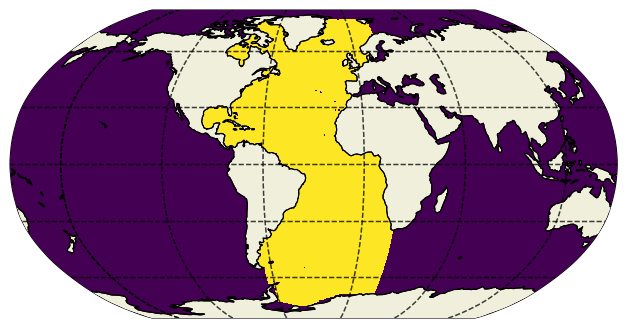

In [18]:
# Get basin mask for the Atlantic ocean and Mediterranean
atl_mask = ecco.get_basin_mask(basin_name = 'atlExt', mask = xr.ones_like(xds.YC))
med_mask = ecco.get_basin_mask(basin_name = 'med', mask = xr.ones_like(xds.YC))

# Take out med from our full atlantic basin mask
atl_no_med = np.logical_and(np.logical_not(med_mask), atl_mask).astype(int)

# Plot the mask as a sanity check
plt.figure(figsize = (8, 4))
ecco.plot_proj_to_latlon_grid(xds.XC, xds.YC, atl_no_med, projection_type = 'robin', cmap = 'viridis', user_lon_0 = -30, show_colorbar = False);

In [36]:
# Calculating the MOC streamfunction at a particular latitude
#   - psi_moc is a cumulative sum in depth space, either from the sea surface or sea floor (50 depth levels) --> doFlip controls direction of summation!
#   - moc takes the max of psi_moc over depth space - should pretty much match up with Solodoch et al. (2023), integral --> sum in discrete case! 
strf = ecco.calc_meridional_stf(xds, lat_vals = [28], basin_name = 'atl')

get_basin_name:  ['atl'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['atl'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)


In [53]:
strf.moc

<xarray.DataArray 'moc' (time: 2, lat: 1)>
array([[14.946646],
       [18.896188]])
Coordinates:
  * lat      (lat) int64 28
  * time     (time) datetime64[ns] 2000-01-16T12:00:00 2000-02-15T12:00:00
Attributes:
    units:    Sv
    name:     meridional overturning strength